## *1.1 Imagenes y Figuras Fractales Aleatorias 3D*

> A partir de la teoria del algoritmo llamado diamante cuadrado por el cual buscamos generar un paisaje que asemeje un terreno tridimensional de acuerdo al concepto de valores aleatorios a partir de fractales tipo plasma. El concepto de variable aletoria funciona como una semilla que determina la distribución de la formación. Los datos de la semilla se agrupan en una matriz, y utilizando la teoría del algorimo diamante cuadrado se van determinando las locaciones de cada punto, ya sea de los pixeles o puntos de la montaña.



## *1.2 Objetivos*

> #### 1.2.1 Objetivo General
>  - Conocer cómo se crean los paisajes y figuras en 3D mediante el uso de fractales aleatorios.

> #### 1.2.2 Objetivos específicos
>  - Aprender de la utilidad del algoritmo diamante-cuadrado.
>  - Generar fractales con las variables aleatorias.
>  - Conocer el modelo matemático de Michael Barnsley y aplicarlo para un fractal en 3 dimensiones.
>  - Graficar los fractales en 3 dimensiones generando el paisaje aleatorio y figuras.
 

## *1.3 Modelo que representa el problema*
### Algoritmo diamante
>La teoría del algoritmo diamante-cuadrado define que se tiene que comenzar con una matriz cuadrada con dimensiones  $2^n +1$, donde la n representa las iteraciones y el +1 nos ayuda a que siempre haya un centro definiendo lados impares. 

>La siguiente imagen representa el comportamiento a seguir del algoritmo, en este caso 2 iteraciones, lo que genera una matriz de 5x5.

<img style="float: center; " src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1200px-Diamond_Square.svg.png" width="900px" height="300px" />


> Como podemos observar en la primera imagen, inicialmente tenemos cuatro esquinas asignadas con valores aleatorios. Utilizando el promedio de las 4 esquinas se genera el centro, a esto se le denomina etapa diamante. Los puntos que quedan en horizontal y vertical a ese centro son generados con el promedio de sus 3 vecinos inmediatos, este paso es lo que se conoce como etapa cuadrado. Este proceso se repite hasta que todas las casillas quedan ocupadas, donde el número de veces que se repite este proceso, son las iteraciones definidas, en el caso de este ejemplo 2 veces. 

**Limitaciones del algoritmo: A partir de n>8 existen limitaciones de Hardware para ejecutarse.**

### Fractal Fern 3D
![](Fern.png)

> Es un fractal descrito por un matemático inglés llamado Michael Barnsley, él desarrolló el código de Fern, lo que es un ejemplo de una IFS (Iterated Function System) para la creación de un fractal.​

>En el modelo de Fern, se tiene una matriz definida de 4x12; y como estamos graficando en 3 dimensiones, se tienen los variables x, y y z.

## *1.4 Solución*
### Algoritmo diamante - Fractal plasma
A partir del algoritmo diamante cuadrado haremos un paisaje:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import time
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

In [2]:
def Diamond_square(n):
    
    N = 2**n + 1
    # f escala los valores aleatorios
    f = 100.0

    arr = np.zeros((N, N)) # Inicia la matriz con 0 en todo su cuerpo
    arr[0::N-1,0::N-1] = np.random.uniform(-1, 1, (2,2))*f # Asigna valores aleatorios a las esquinas
    side = N-1  #Define la magnitud de los lados de esa capa

    k = 1 #Variable auxiliar

    while side > 1:
        sideo2 = side // 2 #Divide la magnitud lateral ignorando residuos

        # Diamond step, por cada cuadrado en el arreglo define el punto medio con el promedio de las esquinas 
        for ix in range(k):
            for iy in range(k):
                x0, x1, y0, y1 = ix*side, (ix+1)*side, iy*side, (iy+1)*side #Define los bordes del cuadrante
           
            #Define las coordenadas del centro en el arreglo
                xc = x0 + sideo2  
                yc = y0 + sideo2
            
        #Coloca el pixel en el promedio de sus "vecinos" del diamante, mas un desplazamiento aleatorio.
                arr[yc,xc] = (arr[y0,x0] + arr[y0,x1] + arr[y1,x0] + arr[y1,x1])/4
                arr[yc,xc] += f * np.random.uniform(-1,1)

    # Square step, por cada diamante en el arreglo define el punto medio con el promedio de las esquinas 
        for iy in range(2*k+1):
            yc = sideo2 * iy
            for ix in range(k+1):
                xc = side * ix + sideo2 * (1 - iy % 2)
                if not (0 <= xc < N and 0 <= yc < N):
                    continue
                tot, ntot = 0., 0
            #Coloca el pixel en el promedio de sus "vecinos" del cuadrado, mas un desplazamiento aleatorio.
            #En los bordes solo tiene 3 vecinos
                for (dx, dy) in ((-1,0), (1,0), (0,-1), (0,1)):
                    xs, ys = xc + dx*sideo2, yc + dy*sideo2
                    if not (0 <= xs < N and 0 <= ys < N):
                        continue
                    else:
                        tot += arr[ys, xs]
                        ntot += 1
                arr[yc, xc] += tot / ntot + f * np.random.uniform(-1,1)
        side = sideo2
        k *= 2 #Sirve para nuestra función 2**n + 1
        f/= 2  #Reduce el factor de escala entre cada nivel, produce una forma más "Estética en las alturas"
        
    def f_plotting(arr1, N, plot_type):
        
        if plot_type == 3:
            x_index = [i for i in range(0, N)]
            y_index = [i for i in range(0, N)]
            x_vals, y_vals = np.meshgrid(x_index, y_index)
            fig = plt.figure(figsize=(16,8))
            p2 = fig.add_subplot(111, projection="3d")
            p2.set_title("Diamond-Square 3D - n = %s"%n,fontsize=20)
            p2.set_aspect("equal")
            p2.set_xlabel('X')
            p2.set_ylabel('Y')
            p2.set_zlabel('Z')
            p2.plot_surface(x_vals,y_vals, arr1, rstride=1, cstride=1,cmap=plt.cm.Pastel1)
            plt.show()
        else:
            fig = plt.figure(figsize=(16,8))
            p3 = fig.add_subplot(111)
            p3.set_title("Fractal plasma - n = %s"%n,fontsize =20)
            p3.set_aspect("equal")
            plt.xlabel('$x$',fontsize=16)
            plt.ylabel('$y$',fontsize=16)
            plt.imshow(arr1, origin="lower", cmap=plt.cm.Greens)
            plt.show()
            
    
    plot_type = 2
    f_plotting(arr, N, plot_type)
    plot_type = 3
    f_plotting(arr, N, plot_type)

### Fractal Fern 3D

In [3]:
i = np.arange(1,5)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'gi',"hi", "mi", "ji", "li", "ni", "pi"], dtype='float')
df.index.name = "$i$"
df["ai"]=[0,0.85,0.2,-0.2]
df["bi"]=[0,0,-0.3357,0.3357]
df["ci"]=[0,0,0,0]
df["di"]=[0,0,0.1192,0.1192]
df["ei"]=[0.18,0.85,0.2,0.2]
df["fi"]=[0,0.01027,0,0.3]
df["gi"]=[0,0,0,0]
df["hi"]=[0,-0.1403,0,0]
df["mi"]=[0,0.85,0.3,0.3]
df["li"]=[0,1.76,0.88,0.88]
df["ni"]=[0,0,0,0]
df["ji"]=[0,0,0,0]
df["pi"]=[0.25,0.25,0.25,0.25]

df

,ai,bi,ci,di,ei,fi,gi,hi,mi,ji,li,ni,pi
$i$,,,,,,,,,,,,,
1,0.00,0.0000,0,0.0000,0.18,0.00000,0,0.0000,0.00,0,0.00,0,0.25
2,0.85,0.0000,0,0.0000,0.85,0.01027,0,-0.1403,0.85,0,1.76,0,0.25
3,0.20,-0.3357,0,0.1192,0.20,0.00000,0,0.0000,0.30,0,0.88,0,0.25
4,-0.20,0.3357,0,0.1192,0.20,0.30000,0,0.0000,0.30,0,0.88,0,0.25


In [4]:
Mt_Fern=df.iloc[:,:].values
Mt_Fern

array([[ 0.     ,  0.     ,  0.     ,  0.     ,  0.18   ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.25   ],
       [ 0.85   ,  0.     ,  0.     ,  0.     ,  0.85   ,  0.01027,
         0.     , -0.1403 ,  0.85   ,  0.     ,  1.76   ,  0.     ,
         0.25   ],
       [ 0.2    , -0.3357 ,  0.     ,  0.1192 ,  0.2    ,  0.     ,
         0.     ,  0.     ,  0.3    ,  0.     ,  0.88   ,  0.     ,
         0.25   ],
       [-0.2    ,  0.3357 ,  0.     ,  0.1192 ,  0.2    ,  0.3    ,
         0.     ,  0.     ,  0.3    ,  0.     ,  0.88   ,  0.     ,
         0.25   ]])

## *1.5 Visualización de la solución del problema*

### Algoritmo diamante - Fractal plasma

In [5]:
interact_manual(Diamond_square, n = (1, 8, 1));

interactive(children=(IntSlider(value=4, description='n', max=8, min=1), Button(description='Run Interact', st…

### Fractal Fern 3D

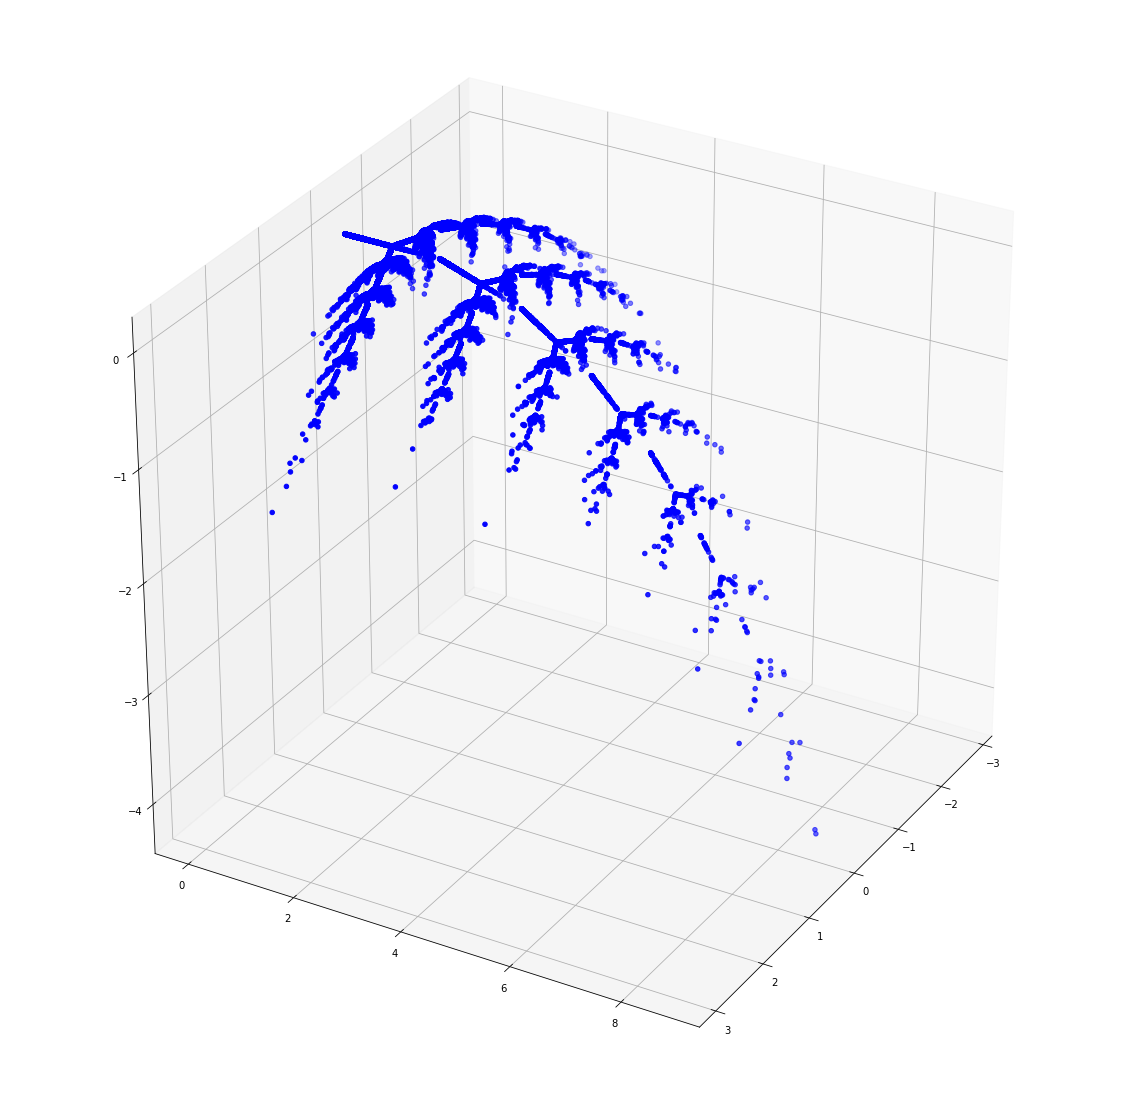

In [6]:
x,y,z=[0,0],[0,0],[0,0]

# Valores de i con su probabilidad
seq=np.array([0,1,2,3])
prob=Mt_Fern[:,-1]
a=Mt_Fern[:,0]
b=Mt_Fern[:,1]
c=Mt_Fern[:,2]
d=Mt_Fern[:,3]
e=Mt_Fern[:,4]
f=Mt_Fern[:,5]
g=Mt_Fern[:,6]
h=Mt_Fern[:,7]
m=Mt_Fern[:,8]
j=Mt_Fern[:,9]
l=Mt_Fern[:,10]
n=Mt_Fern[:,11]
for k in range(100000):
    i=random.choices(seq,prob)
    x.append(a[i]*x[-1]+b[i]*y[-1]+c[i]*z[-1]+j[i])
    y.append(d[i]*x[-2]+e[i]*y[-1]+f[i]*z[-1]+l[i])
    z.append(g[i]*x[-3]+h[i]*y[-2]+m[i]*z[-1]+n[i])
# Graficamos

fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.view_init(30,30)
ax.scatter3D(x, y, z, c='b', marker='o')
#ax.plot3D(x, y, z, c = "b")


plt.show()

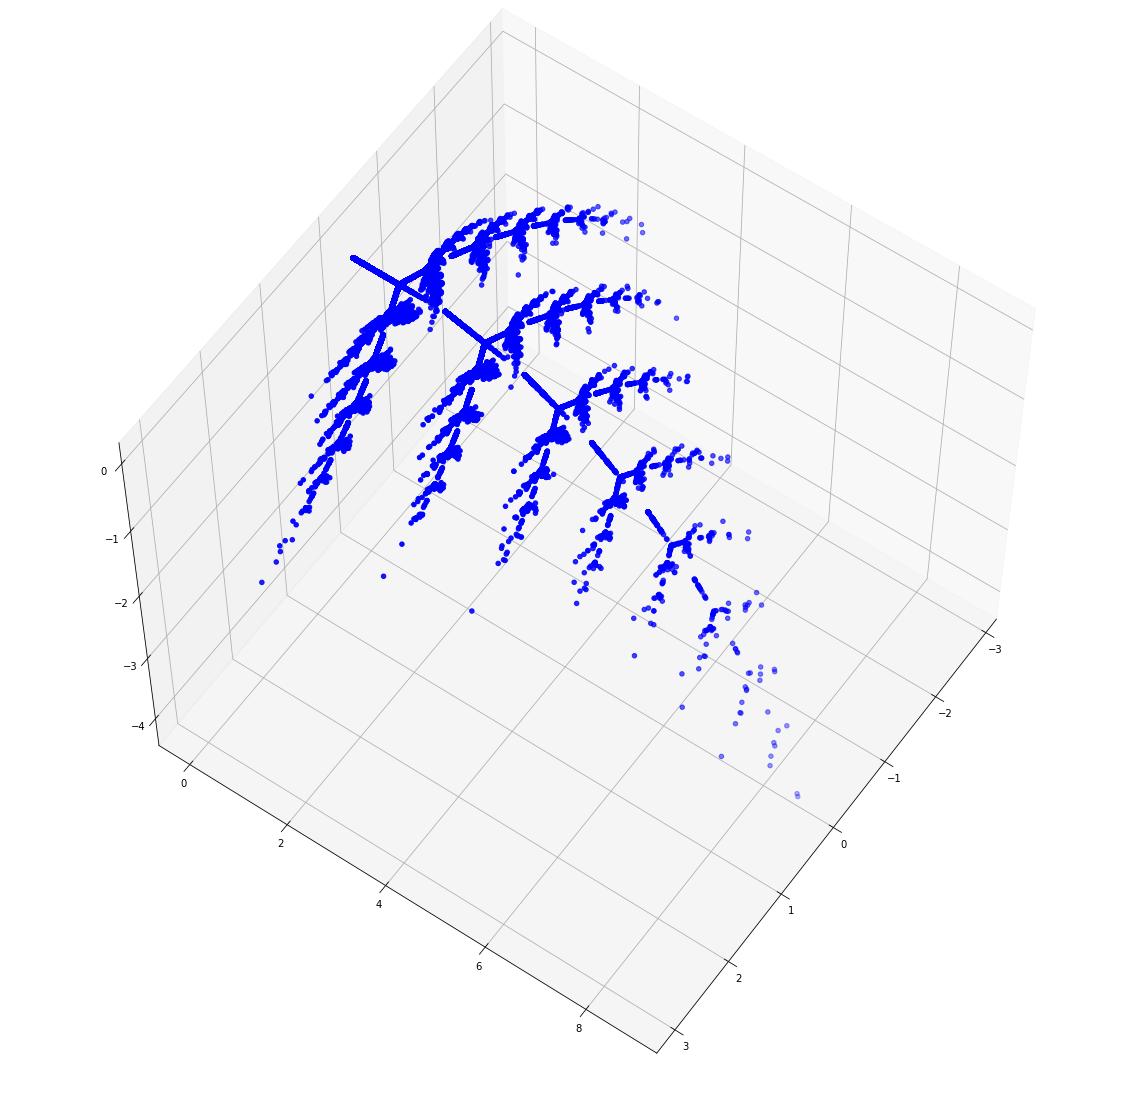

In [7]:
ax.view_init(60, 35)
fig

## *1.6 Conclusiones*

## *1.7 Referencias*

>Argote, J. (06 de Abril de 2013). Asociación Ceat. Obtenido de Tipos de fractales: http://www.asociacionceat.org/aw/2/tipos_de_fractales.html​

>Martyn, T. (2003). Tight bounding ball for affine IFS attractor. Warsaw, Poland. Recuperado 14 de noviembre de 2019.